<a href="https://colab.research.google.com/github/Arucaden/Machine-Learning-2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Daffa Maulana Satria

Kelas : TI-3D

NIM   : 2241720105

---

## MODUL 6 – Histogram, Histogram Equalization, Dithering

In [ ]:
# NO 1

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# NO 2

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
import glob
import math

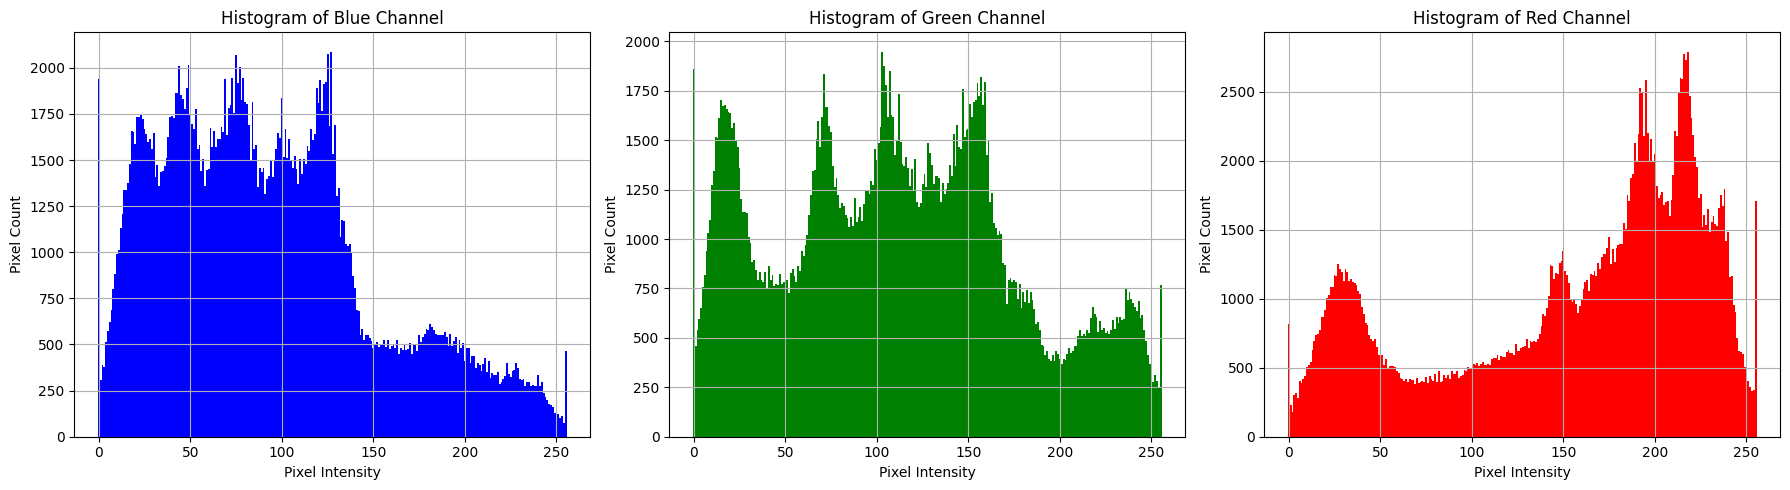

In [ ]:
# NO 3

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Input image (lena.jpg)
image_path = '/content/drive/MyDrive/PCVK/lena.jpg'
image = cv2.imread(image_path)

# Step 1: Input image (RGB) and split into channels
channels = cv2.split(image)

# Step 2: Create individual histograms for each color channel
colors = ('b', 'g', 'r')
channel_names = ['Blue Channel', 'Green Channel', 'Red Channel']

# Step 4: Plot each histogram as a bar chart
plt.figure(figsize=(18, 5))

for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    histogram = cv2.calcHist([channels[i]], [0], None, [256], [0, 256])

    # Use plt.bar() for bar plot
    plt.bar(range(256), histogram.flatten(), color=color, width=1.0)

    plt.title(f'Histogram of {channel_names[i]}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Pixel Count')
    plt.grid(True)

plt.tight_layout()
plt.show()

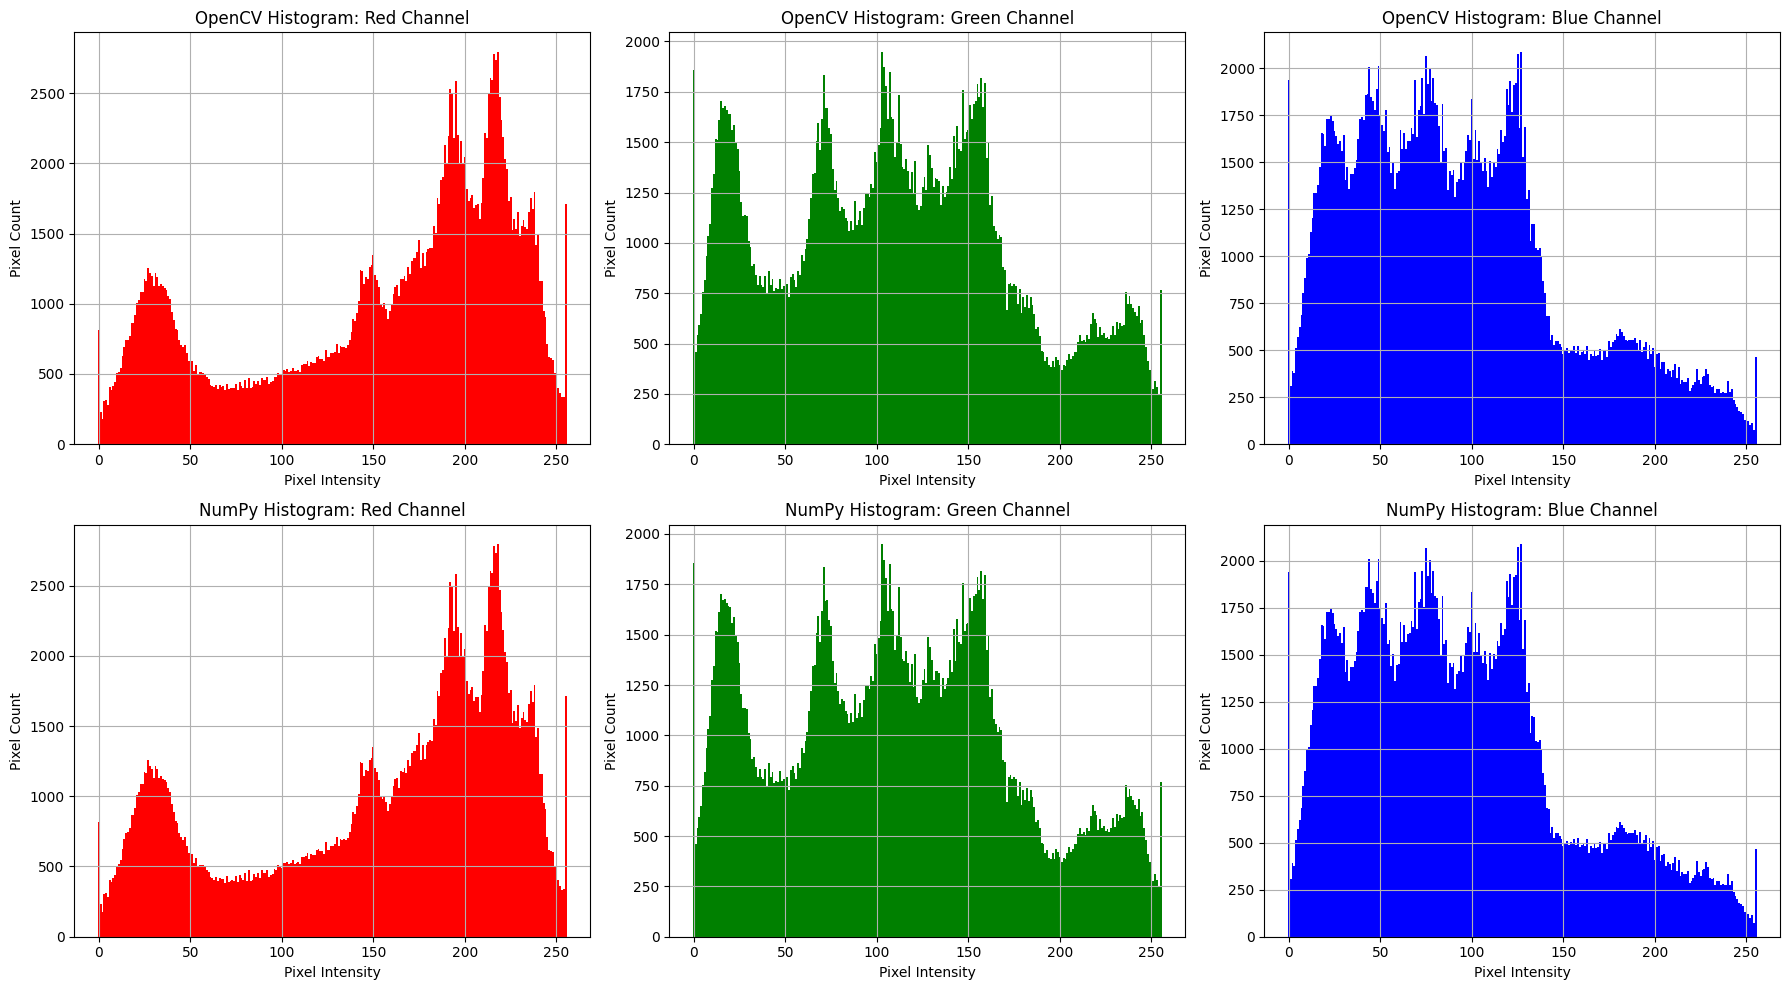

In [20]:
# NO 4

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Input image (lena.jpg)
image_path = '/content/drive/MyDrive/PCVK/lena.jpg'
image = cv2.imread(image_path)

# Step 2: Convert image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Split into channels
channels = cv2.split(image_rgb)

# Colors and labels
colors = ('r', 'g', 'b')
channel_names = ['Red Channel', 'Green Channel', 'Blue Channel']

# Step 4: Plot using OpenCV histograms
plt.figure(figsize=(18, 10))

for i, color in enumerate(colors):
    # OpenCV Histogram
    plt.subplot(2, 3, i+1)
    hist_cv = cv2.calcHist([channels[i]], [0], None, [256], [0, 256])
    plt.bar(range(256), hist_cv.flatten(), color=color, width=1.0)
    plt.title(f'OpenCV Histogram: {channel_names[i]}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Pixel Count')
    plt.grid(True)

# Step 5: Plot using NumPy histograms
for i, color in enumerate(colors):
    # NumPy Histogram
    plt.subplot(2, 3, i+4)
    hist_np, bins = np.histogram(channels[i], bins=256, range=(0, 256))
    plt.bar(range(256), hist_np, color=color, width=1.0)
    plt.title(f'NumPy Histogram: {channel_names[i]}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Pixel Count')
    plt.grid(True)

plt.tight_layout()
plt.show()

Iya sama

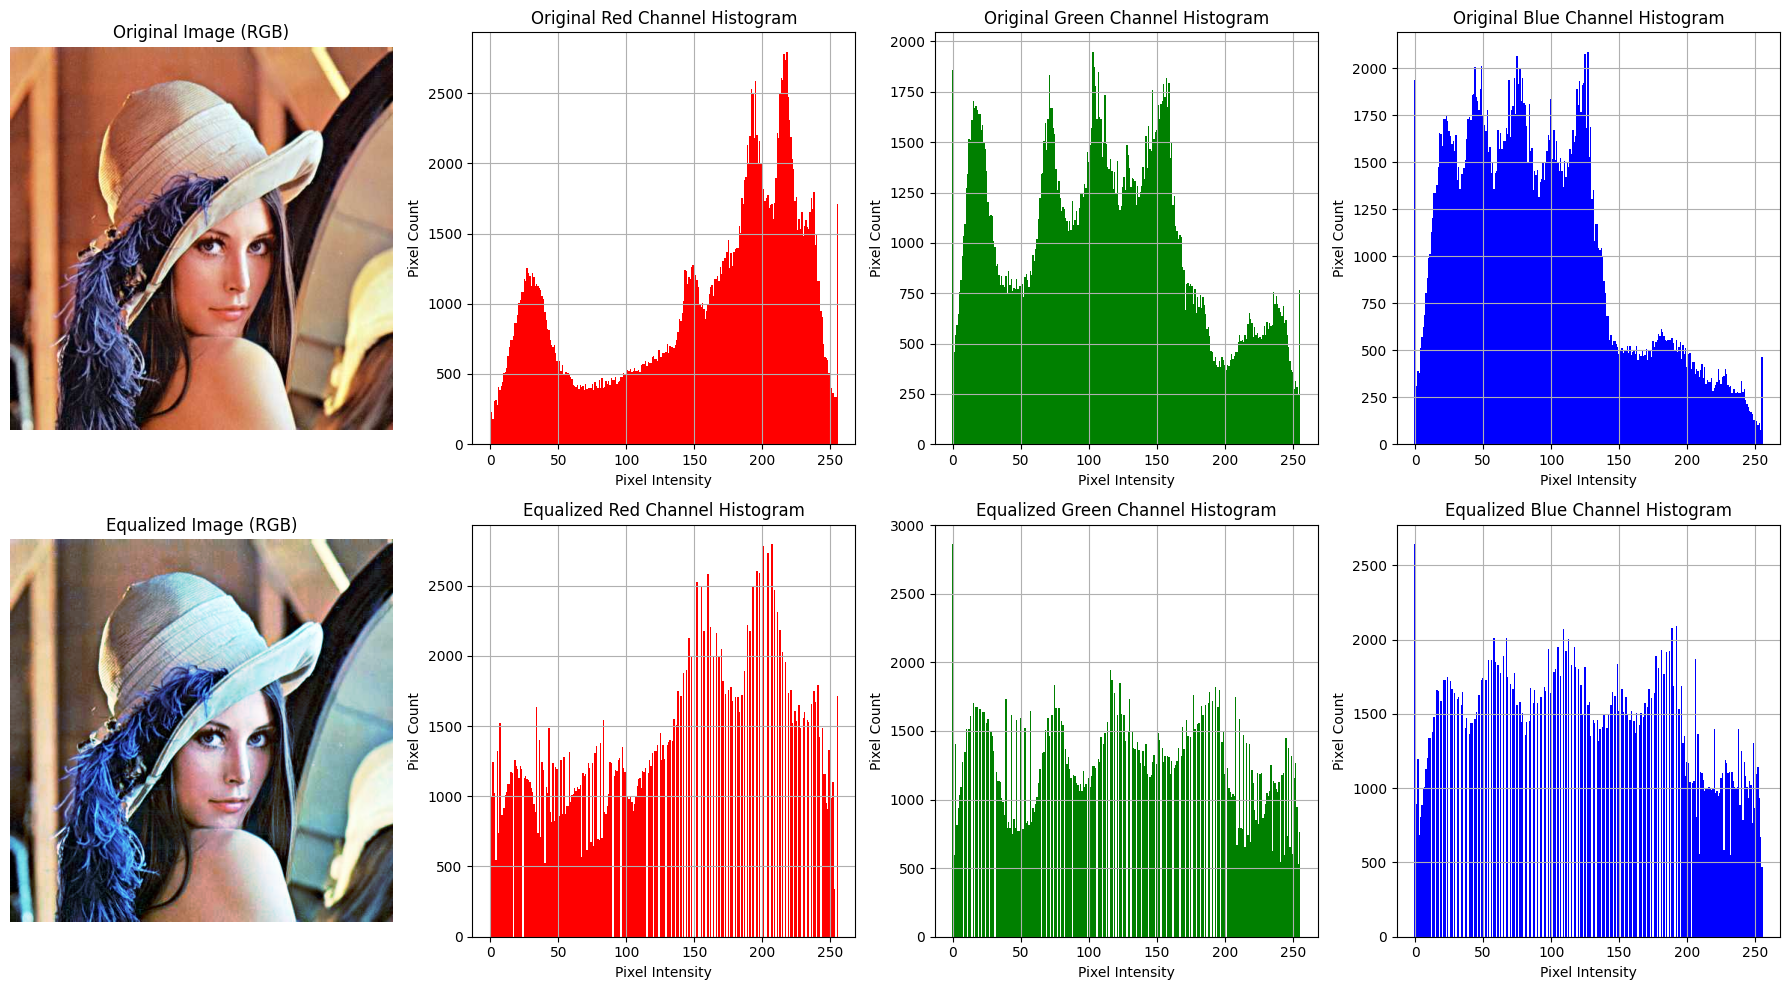

In [26]:
# NO 5

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Input image (RGB)
image_path = '/content/drive/MyDrive/PCVK/lena.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Step 2: Split image into RGB channels
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Function for manual histogram equalization
def histogram_equalization(channel):
    # Menghitung jumlah kemunculan setiap pixel (frekuensi)
    hist, bins = np.histogram(channel.flatten(), 256, [0, 256])

    # Penjumlahan kumulatif dari frekuensi
    cdf = hist.cumsum()  # Cumulative distribution function (CDF)

    # Masking CDF (mengatasi pembagian nol)
    cdf_m = np.ma.masked_equal(cdf, 0)

    # Normalisasi dengan kumulatif frekuensi seluruh pixel
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalisasi

    # Implementasi rumus K0 (Transformasi nilai pixel)
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Fill masked values with 0 and convert to uint8

    # Transformasi kembali dalam bentuk citra
    equalized_channel = cdf[channel]

    return equalized_channel

# Step 3: Apply histogram equalization for each channel
r_eq = histogram_equalization(r_channel)
g_eq = histogram_equalization(g_channel)
b_eq = histogram_equalization(b_channel)

# Step 4: Gabungkan kembali hasil ke dalam citra RGB
equalized_image_rgb = cv2.merge([r_eq, g_eq, b_eq])

# Step 5: Plot original and equalized images with their histograms (Bar chart)
plt.figure(figsize=(18, 10))

# Plot original image
plt.subplot(2, 4, 1)
plt.imshow(image_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')

# Plot equalized image
plt.subplot(2, 4, 5)
plt.imshow(equalized_image_rgb)
plt.title('Equalized Image (RGB)')
plt.axis('off')

# Step 6: Plot bar histograms for each channel (Original)
channels = [r_channel, g_channel, b_channel]
eq_channels = [r_eq, g_eq, b_eq]
colors = ['r', 'g', 'b']
channel_names = ['Red', 'Green', 'Blue']

# Plotting bar chart for original image channels
for i, (channel, color) in enumerate(zip(channels, colors)):
    plt.subplot(2, 4, i + 2)
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.bar(range(256), hist.flatten(), color=color, width=1.0)
    plt.title(f'Original {channel_names[i]} Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Pixel Count')
    plt.grid(True)

# Plotting bar chart for equalized image channels
for i, (eq_channel, color) in enumerate(zip(eq_channels, colors)):
    plt.subplot(2, 4, i + 6)
    hist_eq = cv2.calcHist([eq_channel], [0], None, [256], [0, 256])
    plt.bar(range(256), hist_eq.flatten(), color=color, width=1.0)
    plt.title(f'Equalized {channel_names[i]} Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Pixel Count')
    plt.grid(True)

plt.tight_layout()
plt.show()

Tidak, diagram tidak sama

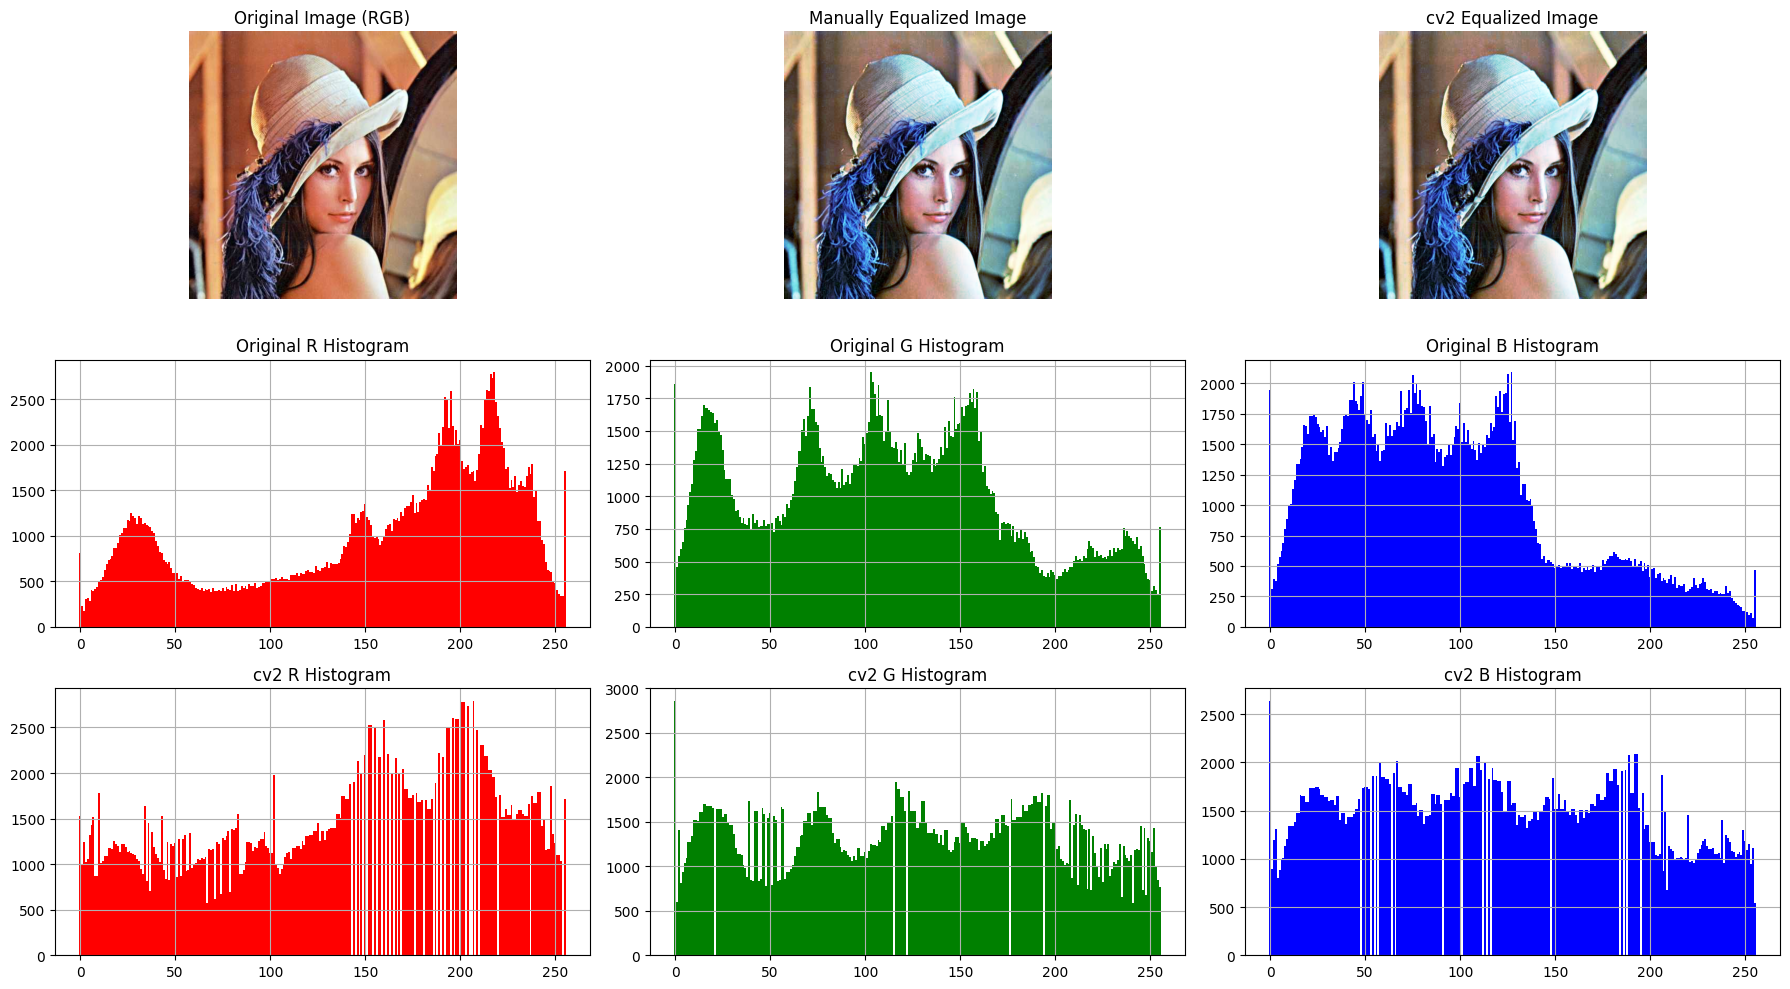

In [31]:
# NO 6
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Input image (RGB)
image_path = '/content/drive/MyDrive/PCVK/lena.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Step 2: Split image into RGB channels
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Step 3: Apply manual histogram equalization (as before)
def manual_histogram_equalization(channel):
    hist, bins = np.histogram(channel.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized_channel = cdf[channel]
    return equalized_channel

r_eq_manual = manual_histogram_equalization(r_channel)
g_eq_manual = manual_histogram_equalization(g_channel)
b_eq_manual = manual_histogram_equalization(b_channel)
equalized_image_manual = cv2.merge([r_eq_manual, g_eq_manual, b_eq_manual])

# Step 4: Apply OpenCV's equalizeHist for each channel
r_eq_cv2 = cv2.equalizeHist(r_channel)
g_eq_cv2 = cv2.equalizeHist(g_channel)
b_eq_cv2 = cv2.equalizeHist(b_channel)
equalized_image_cv2 = cv2.merge([r_eq_cv2, g_eq_cv2, b_eq_cv2])

# Step 5: Plot original, manual, and cv2 equalized images
plt.figure(figsize=(18, 10))

# Plot original image
plt.subplot(3, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')

# Plot manually equalized image
plt.subplot(3, 3, 2)
plt.imshow(equalized_image_manual)
plt.title('Manually Equalized Image')
plt.axis('off')

# Plot cv2 equalized image
plt.subplot(3, 3, 3)
plt.imshow(equalized_image_cv2)
plt.title('cv2 Equalized Image')
plt.axis('off')

# Plot histograms for original image
colors = ['r', 'g', 'b']
channels = [r_channel, g_channel, b_channel]

# Original image histograms
for i, color in enumerate(colors):
    plt.subplot(3, 3, i + 4)
    hist = cv2.calcHist([channels[i]], [0], None, [256], [0, 256])
    plt.bar(range(256), hist.flatten(), color=color, width=1.0)
    plt.title(f'Original {color.upper()} Histogram')
    plt.grid(True)

# Manual equalized histograms
eq_manual_channels = [r_eq_manual, g_eq_manual, b_eq_manual]
for i, color in enumerate(colors):
    plt.subplot(3, 3, i + 7)
    hist_manual = cv2.calcHist([eq_manual_channels[i]], [0], None, [256], [0, 256])
    plt.bar(range(256), hist_manual.flatten(), color=color, width=1.0)
    plt.title(f'Manual {color.upper()} Histogram')
    plt.grid(True)

# cv2 equalized histograms
eq_cv2_channels = [r_eq_cv2, g_eq_cv2, b_eq_cv2]
for i, color in enumerate(colors):
    plt.subplot(3, 3, i + 7)
    hist_cv2 = cv2.calcHist([eq_cv2_channels[i]], [0], None, [256], [0, 256])
    plt.bar(range(256), hist_cv2.flatten(), color=color, width=1.0)
    plt.title(f'cv2 {color.upper()} Histogram')
    plt.grid(True)

plt.tight_layout()
plt.show()

Tidak, histogram tidak sama

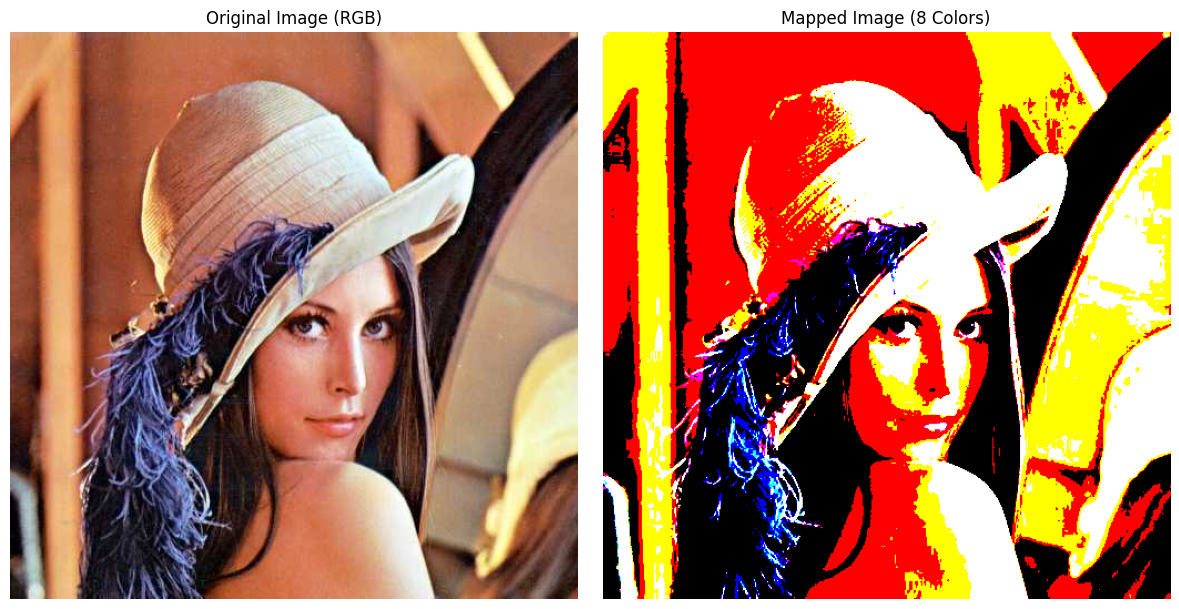

In [32]:
# NO 7

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Input image (RGB)
image_path = '/content/drive/MyDrive/PCVK/lena.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Step 2: Define the color mapping
def map_color(r, g, b):
    # Threshold the colors
    r = 1 if r >= 128 else 0
    g = 1 if g >= 128 else 0
    b = 1 if b >= 128 else 0

    # Map based on the 3-bit RGB combination
    if r == 0 and g == 0 and b == 0:
        return [0, 0, 0]       # Black
    elif r == 1 and g == 1 and b == 1:
        return [255, 255, 255] # White
    elif r == 1 and g == 0 and b == 0:
        return [255, 0, 0]     # Red
    elif r == 0 and g == 1 and b == 0:
        return [0, 255, 0]     # Green
    elif r == 0 and g == 0 and b == 1:
        return [0, 0, 255]     # Blue
    elif r == 1 and g == 1 and b == 0:
        return [255, 255, 0]   # Yellow
    elif r == 0 and g == 1 and b == 1:
        return [0, 255, 255]   # Cyan
    elif r == 1 and g == 0 and b == 1:
        return [255, 0, 255]   # Magenta

# Step 3: Apply color mapping to the entire image
# Initialize an empty image for the mapped result
mapped_image = np.zeros_like(image_rgb)

# Loop through each pixel in the image
for i in range(image_rgb.shape[0]):
    for j in range(image_rgb.shape[1]):
        # Get the R, G, B values for the current pixel
        r, g, b = image_rgb[i, j]

        # Map the color using the function
        mapped_image[i, j] = map_color(r, g, b)

# Step 4: Display the original and mapped image
plt.figure(figsize=(12, 6))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')

# Plot mapped image
plt.subplot(1, 2, 2)
plt.imshow(mapped_image)
plt.title('Mapped Image (8 Colors)')
plt.axis('off')

plt.tight_layout()
plt.show()

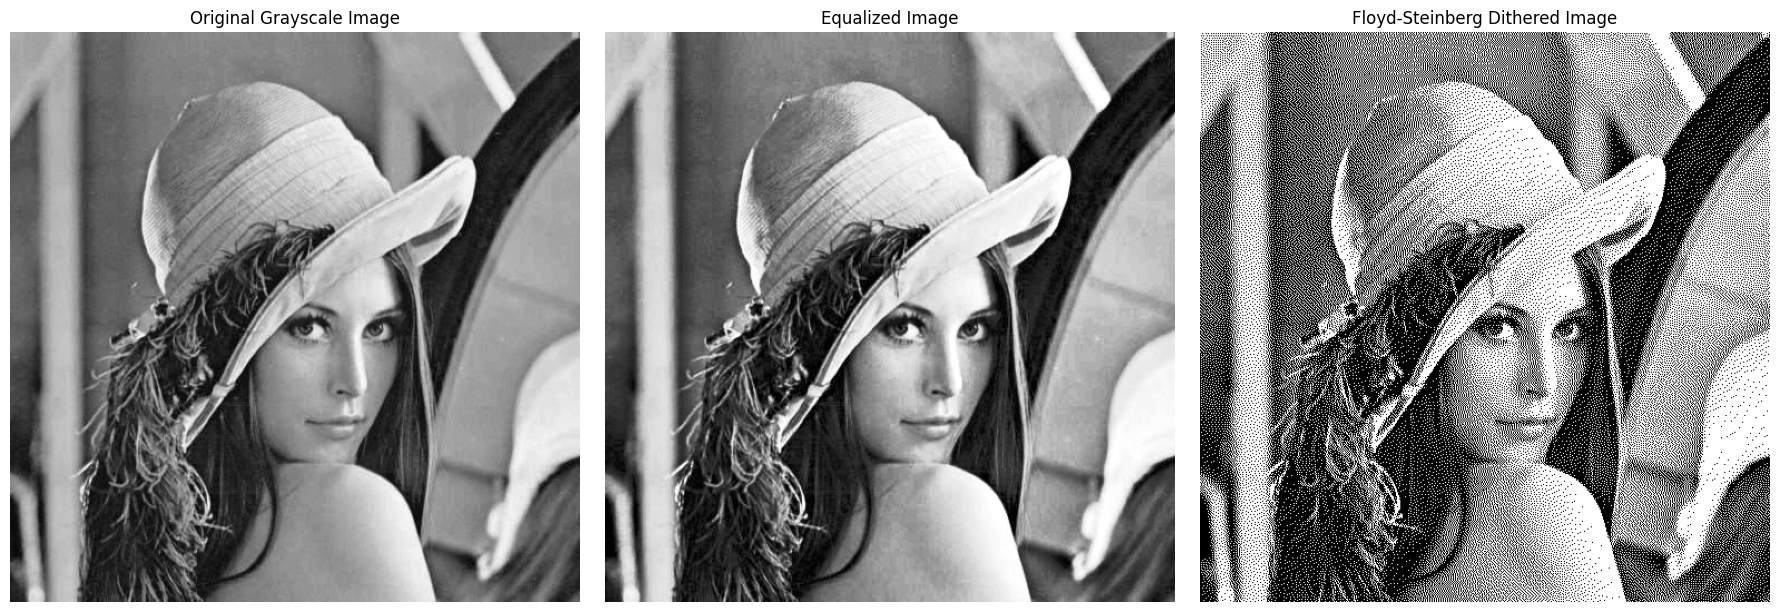

In [34]:
# NO 8

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Input image (lena_lc.jpg)
image_path = '/content/drive/MyDrive/PCVK/lena_lc.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

# Step 2: Apply histogram equalization to improve contrast
equalized_image = cv2.equalizeHist(image)

# Step 3: Floyd-Steinberg dithering
def floyd_steinberg_dithering(image):
    # Copy the image to avoid modifying the original one
    dithered_image = image.copy().astype(np.float32)  # Work with float values

    # Get the dimensions of the image
    rows, cols = dithered_image.shape

    for y in range(rows):
        for x in range(cols):
            old_pixel = dithered_image[y, x]
            new_pixel = np.round(old_pixel / 255) * 255  # Threshold to 0 or 255
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            # Distribute the quantization error using Floyd-Steinberg coefficients
            if x + 1 < cols:
                dithered_image[y, x + 1] += quant_error * 7 / 16
            if y + 1 < rows and x - 1 >= 0:
                dithered_image[y + 1, x - 1] += quant_error * 3 / 16
            if y + 1 < rows:
                dithered_image[y + 1, x] += quant_error * 5 / 16
            if y + 1 < rows and x + 1 < cols:
                dithered_image[y + 1, x + 1] += quant_error * 1 / 16

    # Clip the values to make sure they are between 0 and 255
    return np.clip(dithered_image, 0, 255).astype(np.uint8)

# Apply Floyd-Steinberg dithering to the equalized image
dithered_image = floyd_steinberg_dithering(equalized_image)

# Step 4: Display the original grayscale, equalized, and dithered images
plt.figure(figsize=(18, 6))

# Original grayscale image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Equalized image
plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Dithered image
plt.subplot(1, 3, 3)
plt.imshow(dithered_image, cmap='gray')
plt.title('Floyd-Steinberg Dithered Image')
plt.axis('off')

plt.tight_layout()
plt.show()